In [1]:
import numpy as np
import pandas as pd

stroke_raw_df = pd.read_csv('stroke_raw_df.csv',index_col=0)
stroke_raw_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,33.2,1,0,0,1,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0


In [17]:
from imblearn.combine import SMOTEENN 
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import cross_val_score

X = stroke_raw_df.drop(['stroke','id'], axis=1)
y = stroke_raw_df['stroke']

#Oversampling
resample = SMOTEENN()

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, stratify=y)

#Standardize
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.fit_transform(X_test)

classifier = SVC(kernel='rbf')
classifier.fit(X_train_scaler,y_train)
y_pred = classifier.predict(X_test_scaler)

steps = [('r', resample),('m', classifier)]
pipeline = Pipeline(steps=steps)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X_train_scaler, y_train, scoring=scoring, cv=cv, n_jobs=-1)
y_pred = cross_val_predict(pipeline, X_train_scaler, y_train, cv=2)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

#Classification Report
print(classification_report(y_test.shape, y_pred.shape))

Mean Accuracy: 0.7388
Mean Precision: 0.5350
Mean Recall: 0.6088
              precision    recall  f1-score   support

        1496       0.00      0.00      0.00       1.0
        2242       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/Users/yewandetaiwo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yewandetaiwo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yewandetaiwo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users

In [24]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE(random_state = 101)

X_oversample_svm, y_oversample_svm = svmsmote.fit_resample(X_train, y_train)
classifier_svm = LogisticRegression()
classifier_svm.fit(X_oversample_svm, y_oversample_svm)
print(classification_report(y_test, classifier_svm.predict(X_test)))

print(confusion_matrix(y_test,classifier_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1397
           1       0.23      0.16      0.19        99

    accuracy                           0.91      1496
   macro avg       0.58      0.56      0.57      1496
weighted avg       0.89      0.91      0.90      1496

[[1342   55]
 [  83   16]]


/Users/yewandetaiwo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(<Figure size 432x288 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.9291776412057361, 0.9674266403803118),
  ('0', '1'): (0.0,
   0.9707488995165243,
   0.9291776412057361,
   0.029251100483475522),
  ('1', '0'): (0.9341527655838456,
   0.0,
   0.06584723441615452,
   0.8456659619450316),
  ('1', '1'): (0.9341527655838456,
   0.8489882210812443,
   0.06584723441615452,
   0.15101177891875564)})

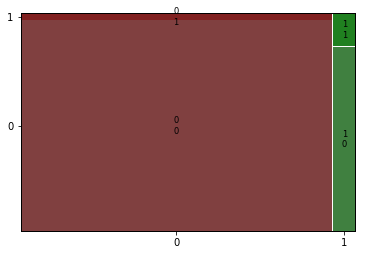

In [22]:
conf_matrix = confusion_matrix(y_test, classifier_svm.predict(X_test))
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)